In [6]:
import pm4py

### Read

In [10]:
import pandas
log = pandas.read_csv("extracted_df.csv")
log['time:timestamp'] = pandas.to_datetime(log['time:timestamp'], utc = True)
log['case:concept:name'] = log['time:timestamp'].astype(str)
log

,Unnamed: 0,concept:name,time:timestamp,ManagedThreadId,NativeThreadId,QpcStamp,case:concept:name,concept:instance,lifecycle:transition,start_timestamp
0,12085,Procfiler/MethodStart_{Microsoft.CodeAnalysis....,2025-01-10 20:01:47.544699+00:00,25452,25452,13371931070429,2025-01-10 20:01:47.544699+00:00,NaN,NaN,2025-01-10 20:01:47.544699+00:00
1,12086,Procfiler/MethodEnd_{Microsoft.CodeAnalysis.Gr...,2025-01-10 20:01:47.544703+00:00,25452,25452,13371931070472,2025-01-10 20:01:47.544703+00:00,NaN,NaN,2025-01-10 20:01:47.544703+00:00
2,12100,Procfiler/MethodStart_{Microsoft.CodeAnalysis....,2025-01-10 20:01:47.544926+00:00,25452,25452,13371931072701,2025-01-10 20:01:47.544926+00:00,NaN,NaN,2025-01-10 20:01:47.544926+00:00
3,12164,Procfiler/MethodStart_{Microsoft.CodeAnalysis....,2025-01-10 20:01:47.546934+00:00,25452,25452,13371931092780,2025-01-10 20:01:47.546934+00:00,NaN,NaN,2025-01-10 20:01:47.546934+00:00
4,12165,Procfiler/MethodStart_{Microsoft.CodeAnalysis....,2025-01-10 20:01:47.546938+00:00,25452,25452,13371931092821,2025-01-10 20:01:47.546938+00:00,NaN,NaN,2025-01-10 20:01:47.546938+00:00
...,...,...,...,...,...,...,...,...,...,...
61139,2308910,Procfiler/MethodStart_{Microsoft.CodeAnalysis....,2025-01-10 20:03:37.134234+00:00,18968,18968,13373026952858,2025-01-10 20:03:37.134234+00:00,NaN,NaN,2025-01-10 20:03:37.134234+00:00
61140,2308911,Procfiler/MethodEnd_{Microsoft.CodeAnalysis.Gr...,2025-01-10 20:03:37.134234+00:00,18968,18968,13373026952860,2025-01-10 20:03:37.134234+00:00,NaN,NaN,2025-01-10 20:03:37.134234+00:00
61141,2319670,Procfiler/MethodStart_{Microsoft.CodeAnalysis....,2025-01-10 20:03:37.331467+00:00,18968,18968,13373028925182,2025-01-10 20:03:37.331467+00:00,NaN,NaN,2025-01-10 20:03:37.331467+00:00
61142,2320087,Procfiler/MethodStart_{Microsoft.CodeAnalysis....,2025-01-10 20:03:37.335607+00:00,18968,18968,13373028966585,2025-01-10 20:03:37.335607+00:00,NaN,NaN,2025-01-10 20:03:37.335607+00:00


### DFG

In [11]:
dfg, start_activities, end_activities = pm4py.discover_dfg(log)

a = list(dfg.values())
a.sort()
a[-100:]

[1,
 2,
 9,
 10,
 26,
 29,
 162,
 179,
 208,
 240,
 277,
 338,
 343,
 347,
 499,
 552,
 572,
 573,
 717,
 1020,
 1106,
 2423,
 2763,
 2953]

In [10]:
threshold = 10000
filtered_dfg = {k: v for k, v in dfg.items() if v >= threshold}
len(filtered_dfg)

28

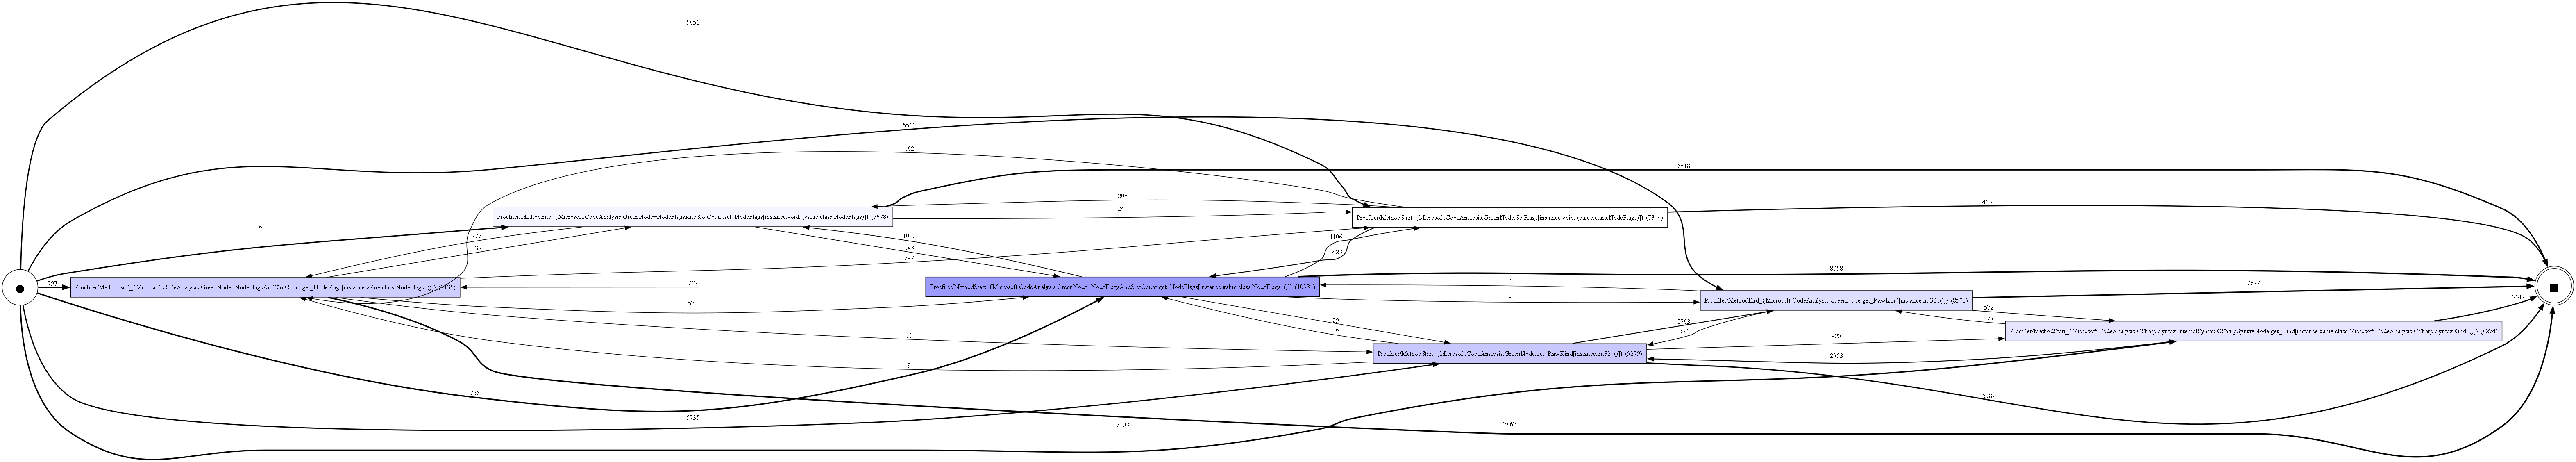

In [12]:
pm4py.view_dfg(dfg, start_activities, end_activities)

### Heuristic net

In [13]:
map = pm4py.discover_heuristics_net(log)

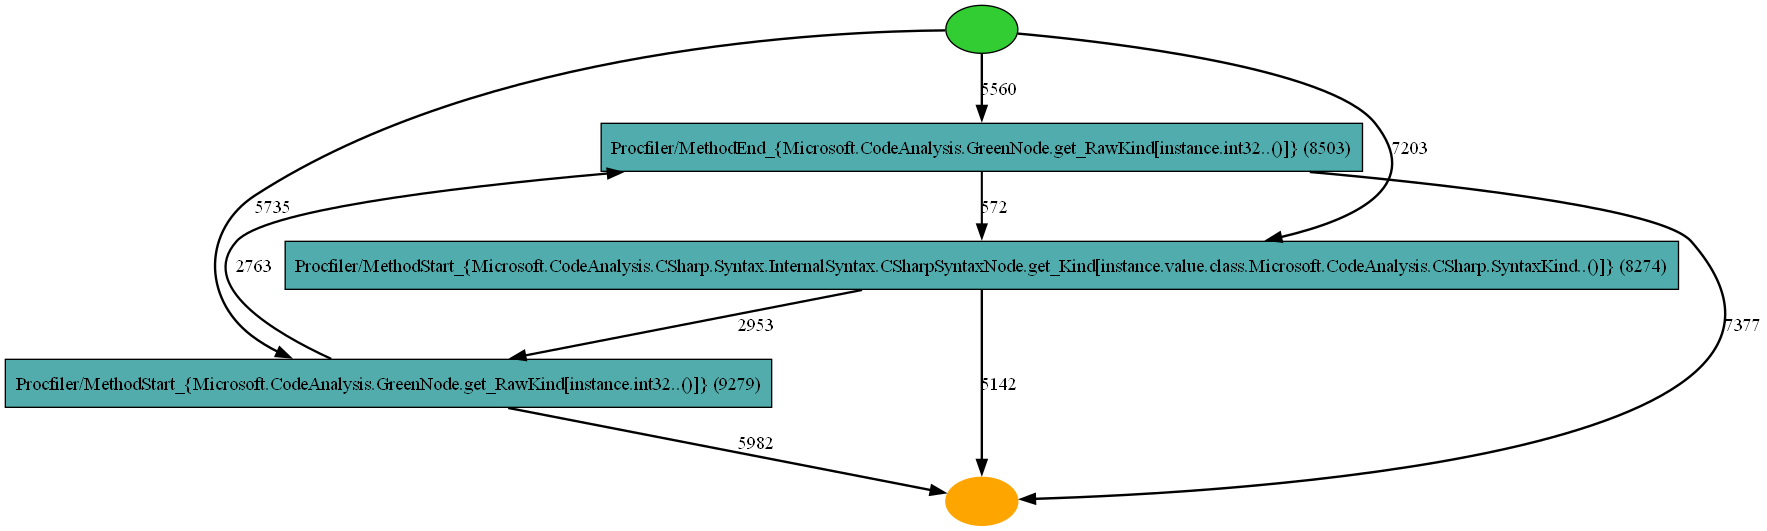

In [14]:
pm4py.view_heuristics_net(map)

### Petri net

In [15]:
process_tree = pm4py.discover_process_tree_inductive(log, noise_threshold = 0.5)

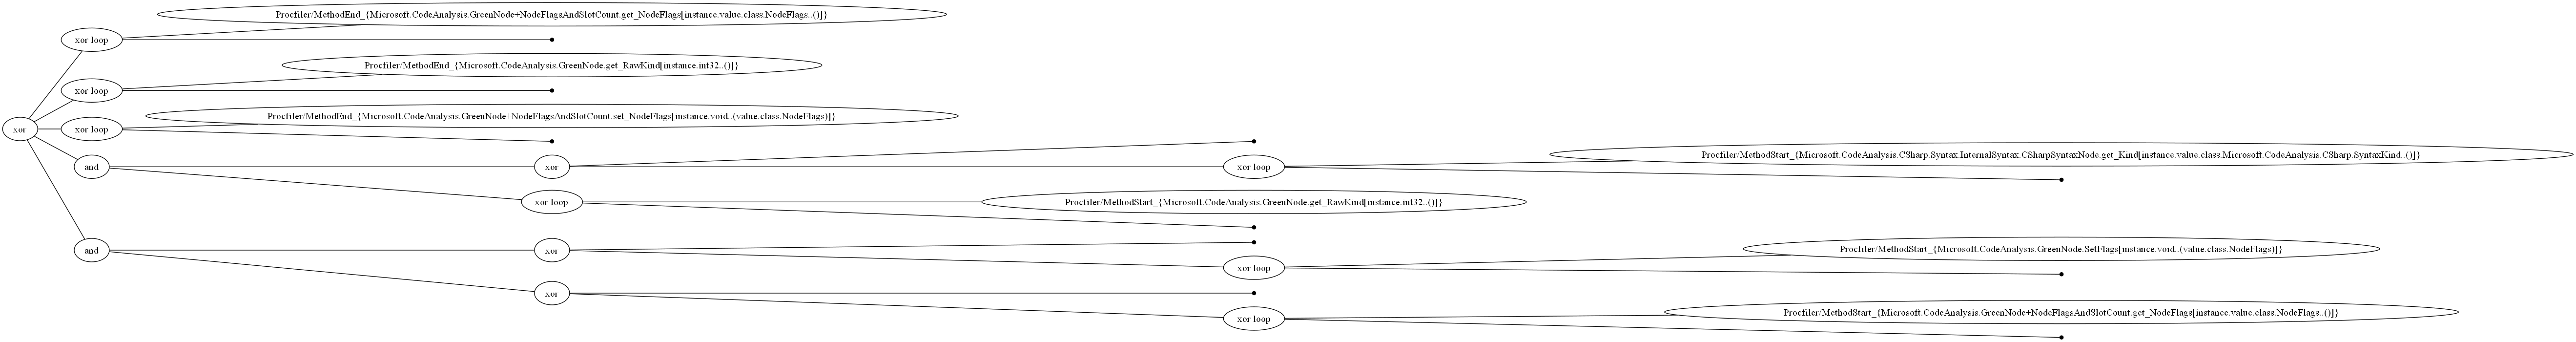

In [16]:
pm4py.view_process_tree(process_tree)

In [17]:
bpmn = pm4py.discover_bpmn_inductive(log, noise_threshold = 0.5)

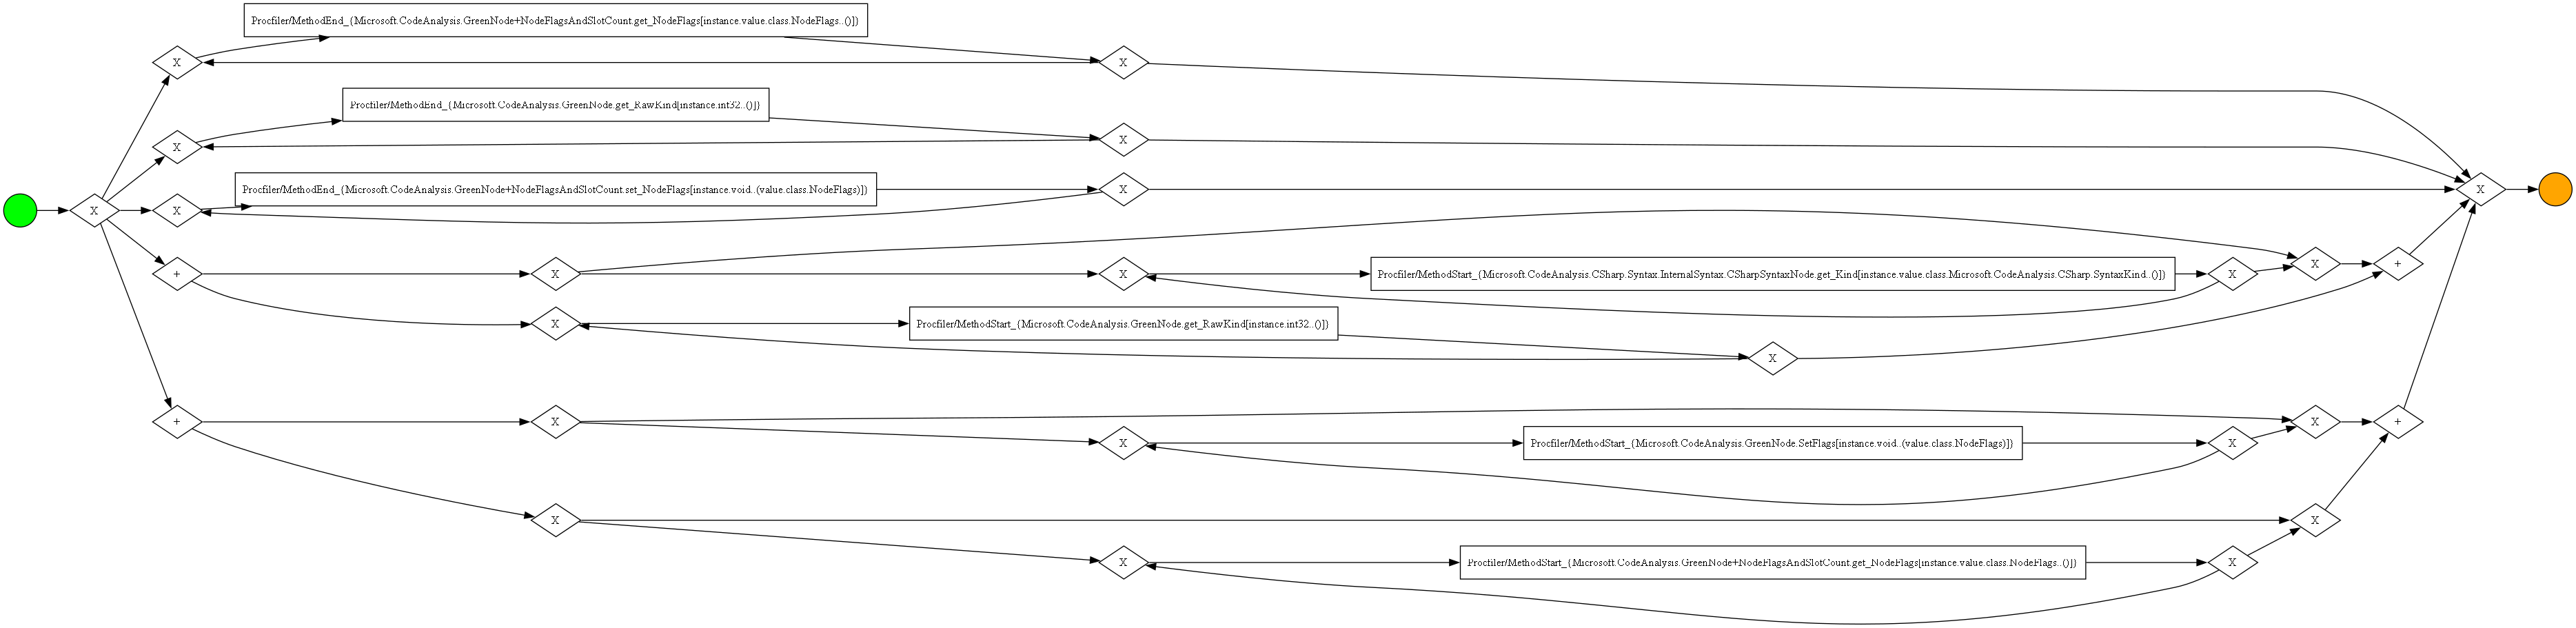

In [ ]:
pm4py.view_bpmn(bpmn)

In [25]:
process_tree = pm4py.discover_process_tree_inductive(log_min2[:10000], multi_processing = False)

In [ ]:
ts = pm4py.discover_transition_system(log_min)

In [26]:
pm4py.view_process_tree(process_tree)

In [ ]:
declare_model = pm4py.discover_declare(log_min, min_support_ratio = 0.9, min_confidence_ratio = 0.9)
declare_model

In [ ]:
pm4py.conformance_declare(log_min[:100], declare_model)

In [ ]:
pm4py.get_end_activities(log)

In [ ]:
log_min = log.groupby('case:concept:name')
log_min

In [ ]:
pm4py.petri_net

In [ ]:
log_min = log[~log["concept:instance"].isna()].groupby('case:concept:name').head(1000)
log_min

In [ ]:
petri_net = pm4py.discover_process_tree_inductive(log_min, multi_processing = True, noise_threshold = 0.7)

petri_net

KeyboardInterrupt: 

In [ ]:
pm4py.view_petri_net(petri_net)

In [ ]:
dfg, start_activities, end_activities = pm4py.discover_dfg(log_min)

In [ ]:
pm4py.view_dfg(dfg, start_activities, end_activities)

In [ ]:
map = pm4py.discover_heuristics_net(log_min)

In [ ]:
pm4py.view_heuristics_net(map)

In [ ]:
process_tree = pm4py.petri_net(log_min, multi_processing = True)

process_tree